In [19]:
using DelimitedFiles
using HDF5
using Plots; gr();

# Load data 

In [20]:
christensen_vs, c_vs = readdlm("../data/christensen_mooney/christensen_1995_vs.csv", ',', header=true)
christensen_vp, c_vp = readdlm("../data/christensen_mooney/christensen_1995_vp.csv", ',', header=true)


(Any["Andesite (AND)" 200.0 5.533 0.26; "Andesite (AND)" 400.0 5.712 0.227; … ; "Dunite (DUN)" 800.0 8.39 0.084; "Dunite (DUN)" 1000.0 8.399 0.085], AbstractString["Sample" "Pressure (MPa)" "Vp" "Vp std"])

In [21]:
dabie_vs, d_vs = readdlm("../data/dabie_vs.csv", ',', header=true)
dabie_vp, d_vp = readdlm("../data/dabie_vp.csv", ',', header=true)

(Any["D95-10" "X" … 6.4 6.35; "D95-10" "Y" … 6.35 6.29; … ; "TC3" "" … "" ""; "TC3" "" … "" ""], AbstractString["Sample" "" … "400 C" "600 C"])

# How do Vp VpVs plots differ in Dabie vs Christensen?

In [22]:
print(d_vs)

AbstractString["Sample" "" "25 Mpa" "50 Mpa" "100 Mpa" "200 Mpa" "400 Mpa" "600 Mpa" "100 C" "200 C" "400 C" "600 C"]

In [23]:
cond = findfirst(isequal("600 Mpa"), d_vs[:])  # compare at 600 Mpa, room temp
d_vs_of_interest = dabie_vs[dabie_vs[:,2] .== "Mean", cond]
d_vp_of_interest = dabie_vp[dabie_vp[:,2] .== "Mean", cond];

In [24]:
c_vs_of_interest = christensen_vs[christensen_vs[:,2] .== 600, 3]
c_vp_of_interest = christensen_vp[christensen_vp[:,2] .== 600, 3];
c_vp_er = christensen_vp[christensen_vp[:,2] .== 600, 4];

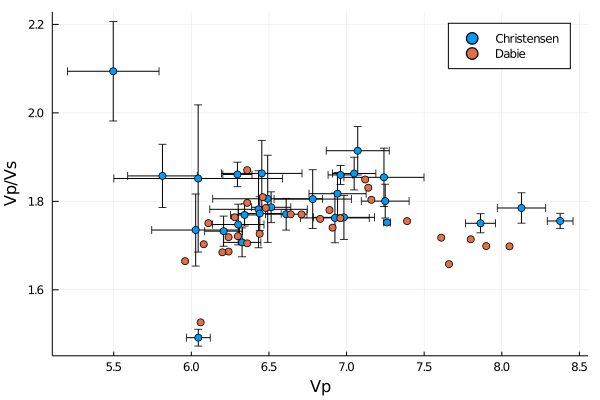

In [25]:
scatter(c_vp_of_interest, c_vp_of_interest ./ c_vs_of_interest, xerr=c_vp_er, 
    yerr=(c_vp_er ./ c_vs_of_interest), # not quite true
    label="Christensen")
scatter!(d_vp_of_interest, d_vp_of_interest ./ d_vs_of_interest, label="Dabie",
    ylabel="Vp/Vs", xlabel="Vp")


# Match labels

In [26]:
samples, _ = readdlm("../data/kern_dabie_minmode.csv", ',', header=true)
samples = samples[:,1:2];

In [27]:
kd_cm_match = Dict([("HT6", "AMP"),
("D95-19", "AMP"),
("D95-24", "ECL"),
("D95-25", "ECL"),
("D95-26", "ECL"),
("D95-32", "ECL"),
("D95-38", "ECL"),
("D95-40", "ECL"),
("D95-11", "GAB"),
("D95-27", "SER") ,# SER 
("D95-13", "GRA"),
("HT1", "PGR"), # 
("HL3", "MGR"),
("HL9", "MGR"),
("TC3", "GGN") ,# granite gneiss 
("FH7", "MBL"),
("D95-2", "AMP"),  
("D95-3", "PY X"),  
("D95-4", "AMP")  ,
("D95-6", "MGW"),
("D95-12", "AMP"),
("D95-22", "GGN"),
("D95-9", "QTZ"),
("D95-35", "ECL"),
("D95-10", "BGN"),
("D95-16", "BGN"),
("D95-7", "BGN"),
("HT4", "GGN"),
("D95-39", "BGN"), 
("D95-44", "GGN")]);

# Compare per-type vp, vp/vs, vs

In [28]:
christ_types = unique(values(kd_cm_match))

13-element Array{String,1}:
 "QTZ"
 "MGR"
 "ECL"
 "GRA"
 "BGN"
 "GGN"
 "SER"
 "AMP"
 "PGR"
 "MGW"
 "MBL"
 "GAB"
 "PY X"

In [29]:
p1 = scatter() 
p2 = scatter()

targets = unique(values(kd_cm_match))
for (i, target) in enumerate(targets)
    #filter = samples[:,3] .== target
    println(target)
    
    # Filter dabie 
    cond = findfirst(isequal("600 Mpa"), d_vs[:])  # compare at 600 Mpa, room temp
    
    filter = (dabie_vs[:,2] .== "Mean") .& ([kd_cm_match[s] for s in dabie_vs[:,1]] .== target)
    d_vs_of_interest = dabie_vs[filter, cond]
    
    filter = (dabie_vp[:,2] .== "Mean") .& ([kd_cm_match[s] for s in dabie_vp[:,1]] .== target)
    d_vp_of_interest = dabie_vp[filter, cond];
    
    # Filter christensen 
    c_vs_of_interest = christensen_vs[((christensen_vs[:,2] .== 600) .& contains.(christensen_vs[:,1], target)), 3]
    c_vp_of_interest = christensen_vp[(christensen_vp[:,2] .== 600) .& contains.(christensen_vp[:,1], target), 3];
    c_vp_er = christensen_vp[(christensen_vp[:,2] .== 600) .& (contains.(christensen_vp[:,1], target)), 4];

    #println(c_vp_er)
    scatter!(p1, [i], c_vp_of_interest, yerr=c_vp_er, c="blue")
    scatter!(p1, fill(i,length(d_vs_of_interest)), d_vp_of_interest, c="red")
    
    scatter!(p2, [i], c_vp_of_interest ./ c_vs_of_interest, yerr=c_vp_er./c_vs_of_interest, c="blue")
    scatter!(p2, fill(i,length(d_vs_of_interest)), d_vp_of_interest ./ d_vs_of_interest, c="red")
end

labels = [christensen_vp[findfirst(contains(t), christensen_vp)] for t in targets]
scatter!(p1, ylabel="Vp", legend=false, xticks=(1:length(targets), labels), 
    xrotation=45, size=(600,400))

scatter!(p2, ylabel="Vp/Vs", legend=false, xticks=(1:length(targets), labels), 
    xrotation=45, size=(600,400));
    

QTZ
MGR
ECL
GRA
BGN
GGN
SER
AMP
PGR
MGW
MBL
GAB
PY X


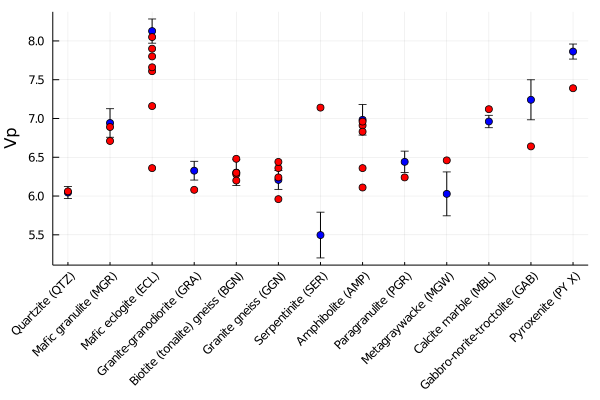

In [30]:
p1

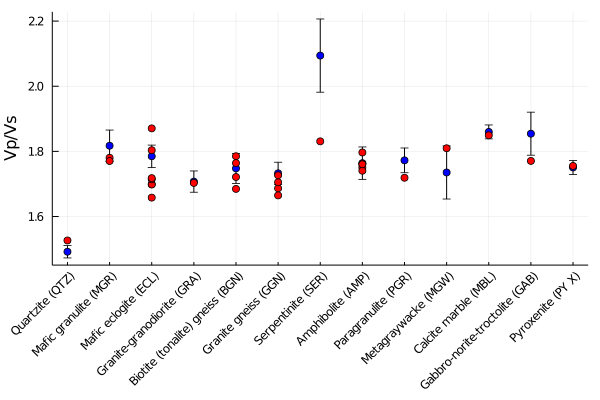

In [31]:
p2

# Add visualization of predicted props

In [7]:
dat = h5read("../data/perplexStability.h5", "res");
cols = ["depth", "temp", "sample", "P", "T", "porosity", 
    "perplex rho", "perplex vp", "perplex vp/vs", "perplex vs", 
    "err vp", "err vpvs", "err vs"];
conditions = dat[:,1,1:2];

In [9]:
# perplexStability includes runs at may formation conditions. we are interested in two conditions: 30 km and 20 km 
t1 = (30,550)
t2 = (20,450)
j1 = argmin(sqrt.((conditions[:,1].-t1[1]).^2 .+ (conditions[:,2].-t1[2]).^2))
j2 = argmin(sqrt.((conditions[:,1].-t2[1]).^2 .+ (conditions[:,2].-t2[2]).^2))


77

In [12]:
# data contains data measured at many conditions, we are interested in 60 MPa and 20 C
condition_filter = (dat[:,:,4] .== 600) .& (dat[:,:,5] .== 20);

In [77]:
perplex_dat = Array{Any,2}(dat[j1,condition_filter[j2,:],:])
if !issorted(perplex_dat[:,3])
    throw("not sorted")
end
perplex_dat[:,3] .= [kd_cm_match[s] for s in samples[:,1]];

In [78]:
p1 = scatter() 
p2 = scatter()
colors = distinguishable_colors(10, [RGB(1,1,1), RGB(0,0,0)], dropseed=true)

targets = unique(values(kd_cm_match))
for (i, target) in enumerate(targets)
    #filter = samples[:,3] .== target
    println(target)
    
    # Filter dabie 
    cond = findfirst(isequal("600 Mpa"), d_vs[:])  # compare at 600 Mpa, room temp
    
    filter = (dabie_vs[:,2] .== "Mean") .& ([kd_cm_match[s] for s in dabie_vs[:,1]] .== target)
    d_vs_of_interest = dabie_vs[filter, cond]
    
    filter = (dabie_vp[:,2] .== "Mean") .& ([kd_cm_match[s] for s in dabie_vp[:,1]] .== target)
    d_vp_of_interest = dabie_vp[filter, cond];
    
    # Filter christensen 
    c_vs_of_interest = christensen_vs[((christensen_vs[:,2] .== 600) .& contains.(christensen_vs[:,1], target)), 3]
    c_vp_of_interest = christensen_vp[(christensen_vp[:,2] .== 600) .& contains.(christensen_vp[:,1], target), 3];
    c_vp_er = christensen_vp[(christensen_vp[:,2] .== 600) .& (contains.(christensen_vp[:,1], target)), 4];
    
    # Filter Perple_X 
    p_vp_of_interest = perplex_dat[perplex_dat[:,3] .== target, 8]
    p_vs_of_interest = perplex_dat[perplex_dat[:,3] .== target, 10]

    #println(c_vp_er)
    scatter!(p1, [i], c_vp_of_interest, yerr=c_vp_er, c=colors[1], label="Christensen")
    scatter!(p1, fill(i,length(d_vs_of_interest)), d_vp_of_interest, c=colors[2], label="Dabie",
        markersize=3, markerstrokewidth=0)
    scatter!(p1, fill(i,length(p_vs_of_interest)), p_vp_of_interest, c=colors[3], label="Perple_X",
        markersize=3, markerstrokewidth=0)
    
    scatter!(p2, [i], c_vp_of_interest ./ c_vs_of_interest, yerr=c_vp_er./c_vs_of_interest, 
        c=colors[1], label="Christensen")
    scatter!(p2, fill(i,length(d_vs_of_interest)), d_vp_of_interest ./ d_vs_of_interest, c=colors[2], label="Dabie", 
        markersize=3, markerstrokewidth=0)
    scatter!(p2, fill(i,length(p_vs_of_interest)), p_vp_of_interest ./ p_vs_of_interest, c=colors[3], label="Perple_X",
        markersize=3, markerstrokewidth=0)
end

labels = [christensen_vp[findfirst(contains(t), christensen_vp)] for t in targets]
scatter!(p1, ylabel="Vp", legend=false, xticks=(1:length(targets), labels), 
    xrotation=45, size=(600,400))

scatter!(p2, ylabel="Vp/Vs", legend=false, xticks=(1:length(targets), labels), 
    xrotation=45, size=(600,400));

QTZ
MGR
ECL
GRA
BGN
GGN
SER
AMP
PGR
MGW
MBL
GAB
PY X


In [76]:
savefig(p1, "../../present/4_30 perplex testing/vp_compare.png")

In [67]:
savefig(p2, "../../present/4_30 perplex testing/vpvs_compare.png")

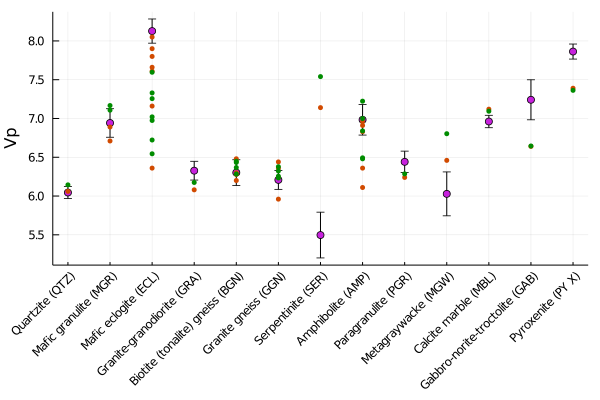

In [79]:
p1

In [91]:
a = Array{Float64,2}(undef,(3,1))
a[:,1] .= [1,2,3]
a

3×1 Array{Float64,2}:
 1.0
 2.0
 3.0

In [93]:
all([true, true])

true